# General Sar Orbit initialization and basic usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arepytools.geometry.orbit import Orbit
from arepytools.io.create_orbit import create_orbit
from arepytools.timing.precisedatetime import PreciseDateTime
from arepytools.io.metadata import StateVectors

[23-MAY-1998 08:25:12.123456789012 23-MAY-1998 08:26:12.123456789012
 23-MAY-1998 08:27:12.123456789012 23-MAY-1998 08:28:12.123456789012
 23-MAY-1998 08:29:12.123456789012 23-MAY-1998 08:30:12.123456789012
 23-MAY-1998 08:31:12.123456789012 23-MAY-1998 08:32:12.123456789012
 23-MAY-1998 08:33:12.123456789012 23-MAY-1998 08:34:12.123456789012]


Text(0, 0.5, 'Value of the component [ECEF, m]')

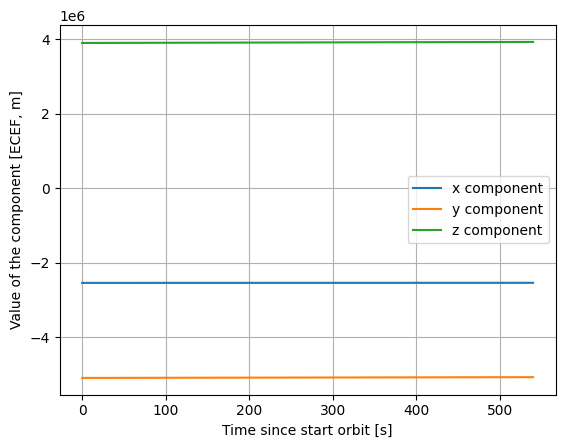

In [2]:
# Time axis and state vectors
time_axis_start = PreciseDateTime.from_utc_string("23-MAY-1998 08:25:12.123456789012345")
time_step = 60
time_axis = np.array([time_axis_start + k * time_step for k in range(10)])

sensor_positions = np.array(
    [
        [-2542286.449576481, -5094859.4894666, 3901083.7183820857],
        [-2542066.5079547316, -5092594.238796566, 3904175.2612526673],
        [-2541845.6347068036, -5090327.468904538, 3907265.6186505724],
        [-2541623.8297894364, -5088059.180544005, 3910354.7896390846],
        [-2541401.0931600337, -5085789.374468956, 3913442.7732819766],
        [-2541177.424776237, -5083518.051433686, 3916529.5686432645],
        [-2540952.8245959855, -5081245.212193193, 3919615.1747874315],
        [-2540727.2925774334, -5078970.857502782, 3922699.5907792132],
        [-2540500.828679304, -5076694.988118281, 3925782.8156838706],
        [-2540273.432860546, -5074417.604795827, 3928864.8485669065],
    ]
)

sensor_velocities = np.array(
    [
        [439, 4529, 6184],
        [440, 4532, 6181],
        [442, 4535, 6179],
        [444, 4538, 6177],
        [446, 4544, 6174],
        [448, 4547, 6172],
        [450, 4550, 6170],
        [452, 4552, 6167],
        [454, 4554, 6165],
        [455, 4555, 6162],
    ]
)
print(time_axis)
time_axis_rel = (time_axis - time_axis_start).astype(float)
plt.plot(time_axis_rel, sensor_positions[:, 0], label="x component")
plt.plot(time_axis_rel, sensor_positions[:, 1], label="y component")
plt.plot(time_axis_rel, sensor_positions[:, 2], label="z component")
plt.grid()
plt.legend()
plt.xlabel("Time since start orbit [s]")
plt.ylabel("Value of the component [ECEF, m]")

## Construct an Interpolated Orbit

The interpolated Orbit object can be create directly using ist class constructor:

In [3]:
# from times, positions and velocities
orbit = Orbit(times=time_axis, positions=sensor_positions, velocities=sensor_velocities)
print(orbit.domain)
print(orbit.times)

(23-MAY-1998 08:25:12.123456789012, 23-MAY-1998 08:34:12.123456789012)
[23-MAY-1998 08:25:12.123456789012 23-MAY-1998 08:26:12.123456789012
 23-MAY-1998 08:27:12.123456789012 23-MAY-1998 08:28:12.123456789012
 23-MAY-1998 08:29:12.123456789012 23-MAY-1998 08:30:12.123456789012
 23-MAY-1998 08:31:12.123456789012 23-MAY-1998 08:32:12.123456789012
 23-MAY-1998 08:33:12.123456789012 23-MAY-1998 08:34:12.123456789012]


or by using the [create_orbit()](../../reference/api/io.rst#arepytools.io.create_orbit.create_orbit) function from the StateVectors metadata loaded from a Product Folder.

In [4]:
state_vectors = StateVectors(
    position_vector=sensor_positions.ravel(),
    velocity_vector=sensor_velocities.ravel(),
    t_ref_utc=time_axis[0],
    dt_sv_s=time_step,
)
orbit = create_orbit(state_vectors=state_vectors)
print(orbit.domain)
print(orbit.times)

(23-MAY-1998 08:25:12.123456789012, 23-MAY-1998 08:34:12.123456789012)
[23-MAY-1998 08:25:12.123456789012 23-MAY-1998 08:26:12.123456789012
 23-MAY-1998 08:27:12.123456789012 23-MAY-1998 08:28:12.123456789012
 23-MAY-1998 08:29:12.123456789012 23-MAY-1998 08:30:12.123456789012
 23-MAY-1998 08:31:12.123456789012 23-MAY-1998 08:32:12.123456789012
 23-MAY-1998 08:33:12.123456789012 23-MAY-1998 08:34:12.123456789012]


## Retrieve the state vectors positions and velocities

In [5]:
sv_pos = orbit.positions
sv_vel = orbit.velocities

np.testing.assert_array_equal(sv_pos, sensor_positions)
np.testing.assert_array_equal(sv_vel, sensor_velocities)

## Compute interpolated positions, velocities and acceleration values at given times

Interpolation is carried out using a Cubic Spline. Extrapolation is not allowed.

Text(0, 0.5, 'Value of the component [ECEF, m]')

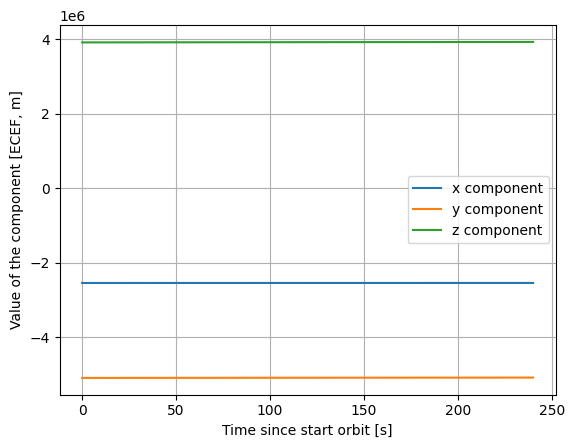

In [6]:
time_axis_refined = np.array([t + 1.25 for t in time_axis[3:-2]])

interpolated_pos = orbit.evaluate(time_axis_refined)
interpolated_vel = orbit.evaluate_first_derivatives(time_axis_refined)
interpolated_acc = orbit.evaluate_second_derivatives(time_axis_refined)

time_axis_refined_rel = (time_axis_refined - time_axis_refined[0]).astype(float)
plt.plot(time_axis_refined_rel, interpolated_pos[:, 0], label="x component")
plt.plot(time_axis_refined_rel, interpolated_pos[:, 1], label="y component")
plt.plot(time_axis_refined_rel, interpolated_pos[:, 2], label="z component")

plt.grid()
plt.legend()
plt.xlabel("Time since start orbit [s]")
plt.ylabel("Value of the component [ECEF, m]")